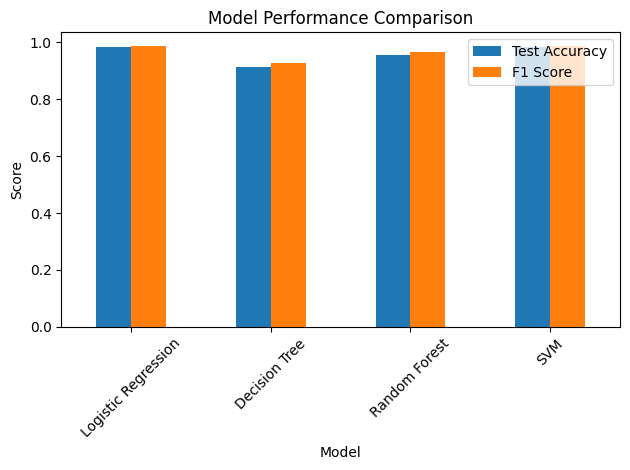

Best Model Selected: Logistic Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split (same split for all models)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling (important for LR & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        train_score = model.score(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_score = model.score(X_train, y_train)

    results.append({
        "Model": name,
        "Train Accuracy": train_score,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Create comparison table
df_results = pd.DataFrame(results)
df_results.to_csv("model_comparison_results.csv", index=False)

# Plot comparison
df_results.set_index("Model")[["Test Accuracy", "F1 Score"]].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_comparison_plot.png")
plt.show()

# Select best model based on F1 Score
best_model_name = df_results.sort_values("F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

# Save best model
joblib.dump(best_model, "best_model.pkl")

print("Best Model Selected:", best_model_name)
